In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [48]:
y_var = pd.read_csv("drive/My Drive/Capstone Shared Docs/result/y_vars.csv")
score_tfidf = pd.read_csv("/content/drive/MyDrive/Capstone Shared Docs/strategy score/tfidf_2011.csv")
score_word2vec = pd.read_csv("/content/drive/MyDrive/Capstone Shared Docs/strategy score/word2_vec_2011.csv")
score_BERT = pd.read_csv("/content/drive/MyDrive/Capstone Shared Docs/strategy score/BERT_2011.csv")

In [51]:
tfidf_all = pd.read_csv("/content/drive/MyDrive/Capstone Shared Docs/strategy score/tfidf_all_years.csv")

In [52]:
tfidf_all_select = tfidf_all[["compid", "name","Strat_score","score_year","incyear","portfoliocompanycity","portfoliocompanystatecounty"]]

In [53]:
tfidf_all_select.head()

,compid,name,Strat_score,score_year,incyear,portfoliocompanycity,portfoliocompanystatecounty
0,143251,Kaseya Limited,0.915727,2000,2000,Miami,FL
1,252811,"Princeton Lightwave, Inc.",0.932353,2000,2000,Cranbury,NJ
2,227621,"Marketing Evolution, Inc.",0.835462,2000,2000,New York,NY
3,30078,"Nanomix, Inc.",0.943362,2000,2000,Emeryville,CA
4,114990,Accolo Inc,0.953666,2000,2000,Lehi,UT


In [54]:
tfidf_all_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7463 entries, 0 to 7462
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compid                       7463 non-null   int64  
 1   name                         7463 non-null   object 
 2   Strat_score                  7463 non-null   float64
 3   score_year                   7463 non-null   int64  
 4   incyear                      7463 non-null   int64  
 5   portfoliocompanycity         7407 non-null   object 
 6   portfoliocompanystatecounty  7461 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 408.3+ KB


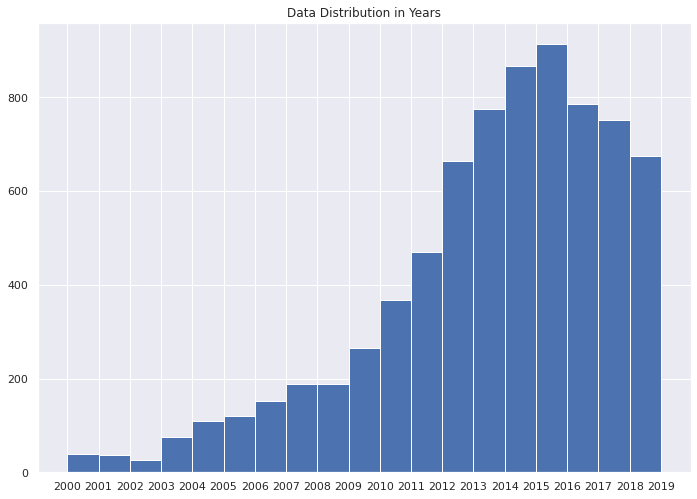

In [55]:
tfidf_all_select.score_year.hist(bins = range(2000,2020))
plt.xticks(range(2000,2020))
plt.title("Data Distribution in Years");

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


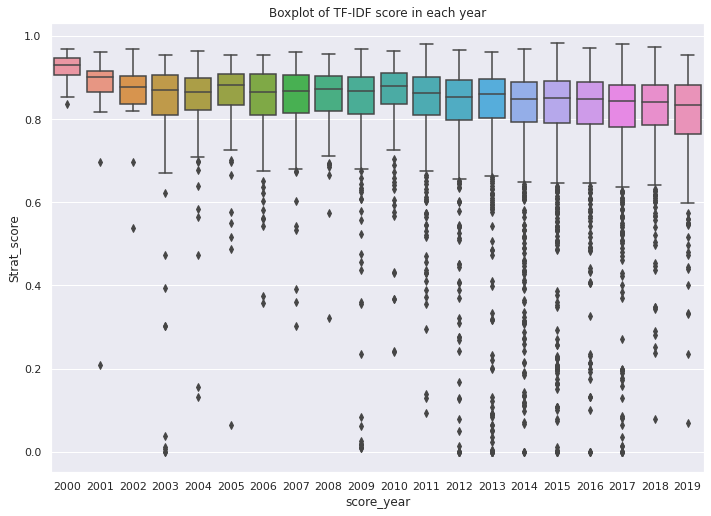

In [56]:
# year distribution of score data
tfidf_all_select["score_year"] = tfidf_all_select["score_year"].astype('category')
#plt.boxplot(tfidf_all_select.score_year,tfidf_all_select.Strat_score)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="score_year", y="Strat_score", data=tfidf_all_select).set_title('Boxplot of TF-IDF score in each year')

In [57]:
y_var.head()

,portfoliocompanyid,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,has_tradesale,tradesale_value
0,26178,8,351.22,0.0,80.0,1.0,74.52,0.0,0.0
1,26580,16,812.00,0.0,292.0,1.0,292.10,0.0,0.0
2,26635,8,710.00,0.0,710.0,1.0,151.30,0.0,0.0
3,26957,1,18.00,0.0,0.0,0.0,0.00,0.0,0.0
4,28167,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [58]:
y_var = y_var.set_index('portfoliocompanyid')
tfidf_all_select = tfidf_all_select.set_index('compid')
TFIDF_var = pd.concat([y_var,tfidf_all_select],axis=1,join='inner')

In [59]:
TFIDF_var.head()

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,has_tradesale,tradesale_value,name,Strat_score,score_year,incyear,portfoliocompanycity,portfoliocompanystatecounty
26178,8,351.22,0.0,80.0,1.0,74.52,0.0,0.0,"Barracuda Networks, Inc.",0.838592,2002,2002,Campbell,CA
28167,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,Active Interest Media Inc.,0.868093,2003,2003,Boulder,CO
30078,8,92.00,0.0,50.0,0.0,0.00,0.0,0.0,"Nanomix, Inc.",0.943362,2000,2000,Emeryville,CA
30392,6,73.10,0.0,43.0,0.0,0.00,1.0,0.0,Netronome Systems,0.813649,2003,2003,Santa Clara,CA
31705,4,59.00,0.0,59.0,0.0,0.00,1.0,0.0,TZero Technologies,0.922791,2003,2003,Santa Clara,CA


In [60]:
TFIDF_var.to_csv("drive/My Drive/Capstone Shared Docs/result/TFIDF_with_var.csv")

### 2011

In [ ]:
y_var.head()

,portfoliocompanyid,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,has_tradesale,tradesale_value
0,26178,8,351.22,0.0,80.0,1.0,74.52,0.0,0.0
1,26580,16,812.00,0.0,292.0,1.0,292.10,0.0,0.0
2,26635,8,710.00,0.0,710.0,1.0,151.30,0.0,0.0
3,26957,1,18.00,0.0,0.0,0.0,0.00,0.0,0.0
4,28167,1,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [ ]:
score = score_tfidf.copy()
score = score.rename(columns = {'Strat_score':'tfidf_score'}) 
score['word2vec_score'] = score_word2vec['Strat_score']
score['BERT_score'] = score_BERT['Strat_score']

In [ ]:
score.head(3)

,text,comp_type,text_cleaned,text_cleaned_with_sw,compid,language,Rela_language,text_len,words_len,website,name,info,Dict_similarity,tfidf_score,word2vec_score,BERT_score
0,Skip to main content area One Click: Safety - ...,S,skip main content area one click safety con...,skip to main content area one click safety ...,98564,en,True,8784,1186,www.stearclear.com,STEARCLEAR,"Founded in 2011 and is based in Paramus, New J...","{3051: 0.23346260078568049, 126701: 0.16235377...",0.840762,0.030242,0.318908
1,Home For Providers For Patients See WellFX Dem...,S,home providers patients see wellfx demo news p...,home for providers for patients see wellfx dem...,93680,en,True,8059,1037,www.well-fx.com,WellFX LLC,"Founded in 2011 and based in California US, We...","{639: 0.0716486793250373, 1638: 0.065549748351...",0.935614,0.033190,0.332222
2,How It Works For A Good Cause Log In Join Now ...,S,works good cause log join barkbox com make bes...,how it works for a good cause log in join now ...,106048,en,True,26178,3425,www.barkbox.com,"BarkBox, Inc.","Founded in 2011 and based in New York, US, Bar...","{1307: 0.24877625116625046, 110537: 0.23897494...",0.771925,0.009504,0.356085


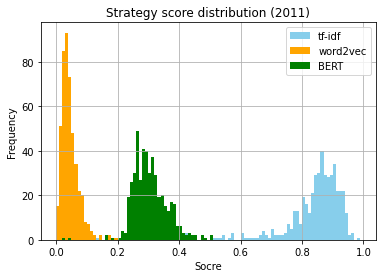

In [ ]:
score.tfidf_score.hist(bins=np.arange(0,1,0.01).tolist(), color = 'skyblue', label = 'tf-idf')
score.word2vec_score.hist(bins=np.arange(0,1,0.01).tolist(), color = 'orange', label = 'word2vec')
score.BERT_score.hist(bins=np.arange(0,1,0.01).tolist(), color = 'green', label = 'BERT')
plt.legend()
plt.title('Strategy score distribution (2011)')
plt.xlabel('Socre')
plt.ylabel('Frequency');

the word2vec need to be adjusted, given that most of companies are 'similar'.

Peason Correlation
                tfidf_score  word2vec_score  BERT_score
tfidf_score        1.000000        0.215591    0.261336
word2vec_score     0.215591        1.000000    0.361116
BERT_score         0.261336        0.361116    1.000000


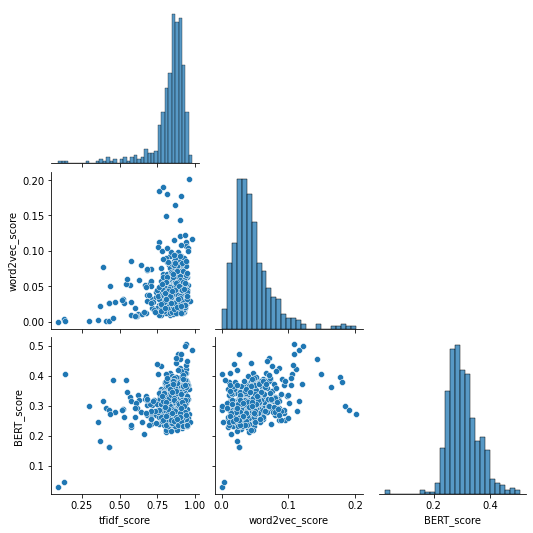

In [ ]:
subdf = score[['tfidf_score','word2vec_score','BERT_score']]
sns.pairplot(subdf, corner=True);
print('Peason Correlation')
print(subdf.corr())

#### log score to eliminate skewness 

In [ ]:
subdf['log_tfidf'] = np.log(subdf['tfidf_score'] + 1)
subdf['log_word2vec'] = np.log(subdf['word2vec_score'] + 1)
subdf['log_BERT'] = np.log(subdf['BERT_score'] + 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

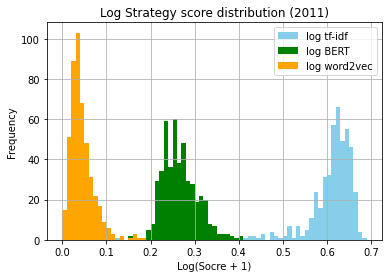

In [ ]:
subdf.log_tfidf.hist(bins=np.arange(0,0.7,0.01).tolist(), color = 'skyblue', label = 'log tf-idf')
subdf.log_BERT.hist(bins=np.arange(0,0.7,0.01).tolist(), color = 'green', label = 'log BERT')
subdf.log_word2vec.hist(bins=np.arange(0,0.7,0.01).tolist(), color = 'orange' ,label = 'log word2vec')
plt.legend()
plt.title('Log Strategy score distribution (2011)')
plt.xlabel('Log(Socre + 1)')
plt.ylabel('Frequency');

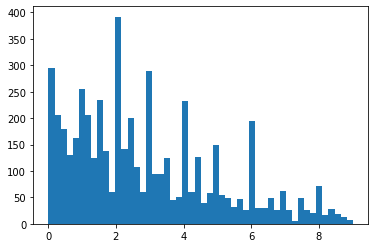

In [ ]:
per = y_var.seed_founding.quantile(0.95)
plt.hist(y_var[(y_var.seed_founding >0)&(y_var.seed_founding < per)].seed_founding,bins = 50);

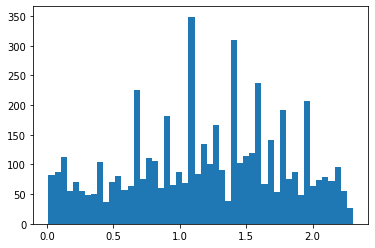

In [ ]:
y_var['log_seed'] = np.log(y_var['seed_founding']+1)
per = y_var.log_seed.quantile(0.95)
plt.hist(y_var[(y_var.log_seed >0) & (y_var.log_seed < per)].log_seed,bins = 50);

### Add a binary version of Seed founding

In [ ]:
idx_has_seed = y_var.seed_founding > 0
y_var['has_seed'] = 0
y_var.loc[idx_has_seed,'has_seed'] = 1
y_var

,portfoliocompanyid,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,has_tradesale,tradesale_value,log_seed,has_seed
0,26178,8,351.22,0.00,80.00,1.0,74.52,0.0,0.0,0.000000,0
1,26580,16,812.00,0.00,292.00,1.0,292.10,0.0,0.0,0.000000,0
2,26635,8,710.00,0.00,710.00,1.0,151.30,0.0,0.0,0.000000,0
3,26957,1,18.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,0
4,28167,1,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
13699,384356,1,10.00,10.00,10.00,0.0,0.00,0.0,0.0,2.397895,1
13700,384360,2,0.15,0.15,0.15,0.0,0.00,0.0,0.0,0.139762,1
13701,384390,1,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.000000,0
13702,384391,1,28.50,0.00,28.50,0.0,0.00,0.0,0.0,0.000000,0


## Build Linear regression model

In [ ]:
# set index
y_var = y_var.set_index('portfoliocompanyid')
score = score.set_index('compid')

In [ ]:
print(y_var.shape)
print(score.shape)

(13704, 10)
(470, 15)


In [ ]:
df = pd.concat([y_var,score],axis=1,join='inner')

In [ ]:
df.head()

,dealcounts,dealsizeusdmn,seed_founding,firstrounds_founding,has_ipo,ipo_value,has_tradesale,tradesale_value,log_seed,has_seed,text,comp_type,text_cleaned,text_cleaned_with_sw,language,Rela_language,text_len,words_len,website,name,info,Dict_similarity,tfidf_score,word2vec_score,BERT_score
72006,14,111.40,0.00,83.20,0.0,0.0,0.0,0.0,0.000000,0,Email a Sales Engineer a Question Please corre...,S,email sales engineer question please correct f...,email a sales engineer a question please corre...,en,True,497668,128953,www.appneta.com,"AppNeta, Inc.","Founded in 2011 and based in Massachusetts, Ap...","{1640: 0.7137819907606033, 7431: 0.70959319808...",0.457320,0.005415,0.384161
72459,10,240.00,0.00,206.00,0.0,0.0,0.0,0.0,0.000000,0,Sign Into Yahoo! New User? Sign Up Voice Home ...,S,sign yahoo new user sign voice home help n...,sign into yahoo new user sign up voice home ...,en,True,9644,1268,www.dialpad.com,"Dialpad, Inc.","Founded in 2011 and based in California, US, D...","{5598: 0.8341507689962296, 77176: 0.6544544604...",0.388242,0.076961,0.315790
72495,3,11.50,0.85,5.25,0.0,0.0,1.0,0.0,0.615186,1,PunchTab Developers How PunchTab works Log in ...,S,punchtab developers punchtab works log invalid...,punchtab developers how punchtab works log in ...,en,True,24006,3225,www.punchtab.com,"PunchTab, Inc.","Founded in 2011, PunchTab is a loyalty platfor...","{95019: 0.11501415250206415, 1690: 0.083924614...",0.912619,0.026383,0.233239
72620,2,3.60,0.60,3.60,0.0,0.0,1.0,0.0,0.470004,1,BestVendor Play Video What is BestVendor? Sign...,S,bestvendor play video bestvendor sign bestven...,bestvendor play video what is bestvendor sign...,en,True,46939,5897,www.bestvendor.com,BestVendor,"Founded in 2011 and is based in Washington, Di...","{137208: 0.2555456063124094, 110537: 0.2519659...",0.763173,0.009705,0.262664
72976,2,3.41,0.00,2.50,0.0,0.0,0.0,0.0,0.000000,0,mission apps team jobs contact press Tweet Str...,S,mission apps team jobs contact press tweet str...,mission apps team jobs contact press tweet str...,en,True,438,61,www.azumio.com,Azumio,"Founded in 2011 and based in Palo Alto, Califo...","{6643: 0.192270023203575, 4551: 0.176114989381...",0.857275,0.094309,0.381392


In [ ]:
scores = ['tfidf_score','word2vec_score','BERT_score']
dep_vars = ['seed_founding','firstrounds_founding','ipo_value']
bin_vars = ['has_seed','has_ipo','has_tradesale']

def LinearReg(df,scores,dep_vars):
  fig, ax = plt.subplots(len(scores),len(dep_vars),figsize=(5*len(scores),3*len(dep_vars)))

  i = 0
  j = 0
  for score in scores:
    for dep_var in dep_vars:
      
      X = np.asarray(df[score]).reshape((-1,1))
      y = np.asarray(df[dep_var]).reshape((-1,1))
      #X = np.asarray(df[df[dep_var]>0][score]).reshape((-1,1))
      #y = np.asarray(df[df[dep_var] >0][dep_var])
      reg = LinearRegression().fit(X,y)
      y_hat = reg.predict(X)

      #print('score:',score, ' dependent variable: ',dep_var)
      #print('R2 score:',reg.score(X,y))
      #print('Coefficents (slope)',reg.coef_)
      #print('\n')

      ax[i,j].scatter(X,y, alpha = 0.5)
      ax[i,j].set_xlabel(score)
      ax[i,j].set_ylabel(dep_var)
      ax[i,j].plot(X,y_hat,color = 'red')

      j = j+1
    j = 0
    i = i + 1

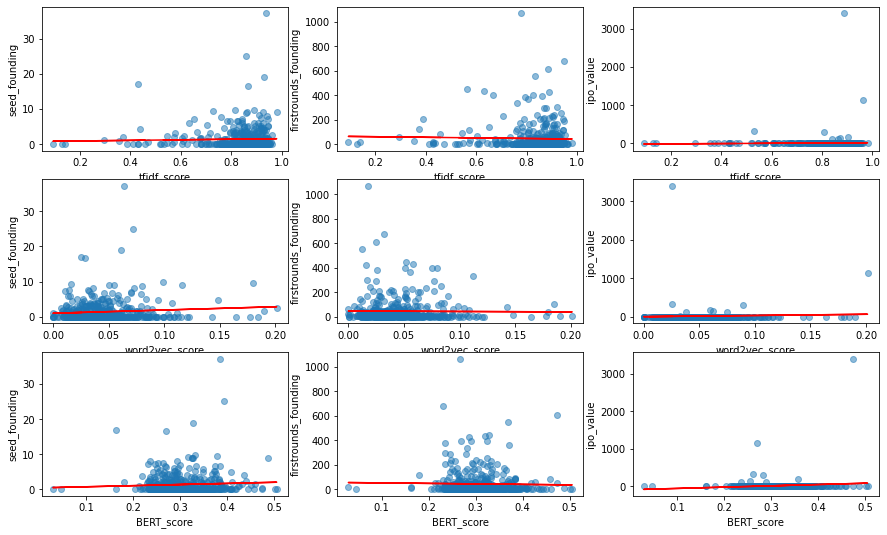

In [ ]:
LinearReg(df,scores,dep_vars)

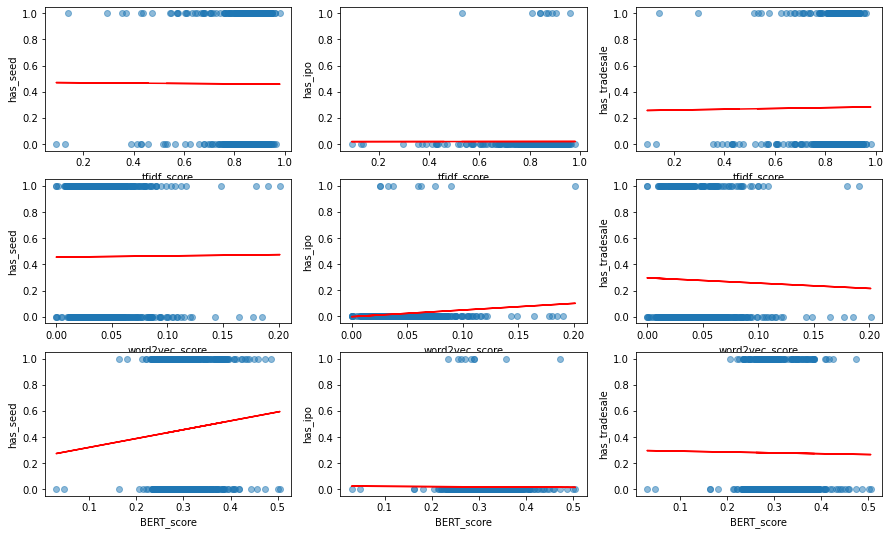

In [ ]:
LinearReg(df,scores,bin_vars)

## Our strategy scores DO NOT perform well but DO show something

- tf-idf show the trend that: with a higher similarity score, we will see a higher seed or first rounds foundings. 

- coefficients tell more: 0.81307481 in the seed founding and tf-idf shows the positive relationship


## To explore

- to further improve our result, to normalize the data would be good, say log.

- we may care more about the has_IPO than the IPO value, which could reduce the variance

- add fixed-effect analysis (year, location, industry) would be helpful

- try to analyze other kinds of exits and see the difference

In [ ]:
df.to_csv("drive/My Drive/Capstone Shared Docs/result/prediction_df.csv")

## Analysis based on R

In [ ]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
pred_df <- read.csv("drive/My Drive/Capstone Shared Docs/result/prediction_df.csv")

In [ ]:
%%R
head(pred_df)

      X dealcounts dealsizeusdmn seed_founding firstrounds_founding has_ipo
1 72006         14        111.40          0.00                83.20       0
2 72459         10        240.00          0.00               206.00       0
3 72495          3         11.50          0.85                 5.25       0
4 72620          2          3.60          0.60                 3.60       0
5 72976          2          3.41          0.00                 2.50       0
6 73164         11         97.95          1.20                36.20       0
  ipo_value has_tradesale tradesale_value  log_seed has_seed
1         0             0               0 0.0000000        0
2         0             0               0 0.0000000        0
3         0             1               0 0.6151856        1
4         0             1               0 0.4700036        1
5         0             0               0 0.0000000        0
6         0             1               0 0.7884574        1
                                         

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

